### Create figures from saved csv files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

/home/filip-marcus/.local/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/filip-marcus/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


### Read csv-files

In [ ]:
# pretrain_data_eneryield = pd.read_csv('/home/filip-marcus/results/eneryield1/pretrain_21_04_2025.csv')
pretrain_data_eneryield = pd.read_csv('/home/filip-marcus/results/eneryield1/pretrain_29_04_2025.csv')
class_dist_baseline = pd.read_csv('/home/filip-marcus/results/eneryield1/class_dist_baseline.csv')
event_label_baseline = pd.read_csv('/home/filip-marcus/results/eneryield1/event_label_baseline.csv')
interruption_in_seq_baseline = pd.read_csv('/home/filip-marcus/results/eneryield1/interruption_in_seq_baseline.csv')
interruption_3_day_baseline = pd.read_csv('/home/filip-marcus/results/eneryield1/interruption_3_day_baseline.csv')
interruption_5_day_baseline = pd.read_csv('/home/filip-marcus/results/eneryield1/interruption_5_day_baseline.csv')
interruption_7_day_baseline = pd.read_csv('/home/filip-marcus/results/eneryield1/interruption_7_day_baseline.csv')

In [ ]:
# Best strategy SM!
one = pd.read_csv('/home/filip-marcus/results/eneryield1/event_label_baseline.csv')
two = pd.read_csv('/home/filip-marcus/results/eneryield1/event_label_interruption_in_seq.csv')
three = pd.read_csv('/home/filip-marcus/results/eneryield1/event_label_interruption_in_seq_class_dist.csv')
four = pd.read_csv('/home/filip-marcus/results/eneryield1/event_label_interruption_in_seq_class_dist_interruption3.csv')
five = pd.read_csv('/home/filip-marcus/results/eneryield1/event_label_interruption_in_seq_class_dist_interruption3_interruption5.csv')
six = pd.read_csv('/home/filip-marcus/results/eneryield1/event_label_interruption_in_seq_class_dist_interruption3_interruption5_interruption7.csv')

In [12]:
three["train_loss"] = three["train_loss"][:-1]
three["train_loss"] = three["train_loss"].astype(float)

In [33]:
# Best strategy FM!
pretrain_data_giga = pd.read_csv('/home/filip-marcus/results/giga_mind/pretrain_04_05_2025.csv')
one = pd.read_csv('/home/filip-marcus/results/giga_mind/interruption_in_seq_baseline.csv')
two = pd.read_csv('/home/filip-marcus/results/giga_mind/interruption_in_seq_event_label.csv')
three = pd.read_csv('/home/filip-marcus/results/giga_mind/interruption_in_seq_event_label_class_dist.csv')
four = pd.read_csv('/home/filip-marcus/results/giga_mind/interruption_in_seq_event_label_class_dist_interruption3.csv')
five = pd.read_csv('/home/filip-marcus/results/giga_mind/interruption_in_seq_event_label_class_dist_interruption3_interruption5.csv')
six = pd.read_csv('/home/filip-marcus/results/giga_mind/interruption_in_seq_event_label_class_dist_interruption3_interruption5_interruption7.csv')

In [34]:
six["train_loss"] = six["train_loss"].clip(upper=150)

In [26]:
five["train_loss"]

0      -8.322845
1     -11.589804
2      -7.742506
3     -10.508665
4      -8.314094
         ...    
235   -18.450094
236    -8.993452
237    -7.932899
238    -9.448144
239    -7.151076
Name: train_loss, Length: 240, dtype: float64

### Settings

In [4]:
green = (33 / 255, 129 / 255, 65 / 255)      # fern frond
purple = (129 / 255, 33 / 255, 97 / 255)    # perfume
yellow = (230 / 255, 161 / 255, 118 / 255)    # apricot
blue = (0 / 255, 103 / 255, 138 / 255)      # orient
red = (130 / 255, 34 / 255, 34 / 255)     # vin rouge
turk = (34 / 255, 130 / 255, 130 / 255)
black = (0 / 255, 0 / 255, 0 / 255)

### Event label confusion matrix

Text(69.0, 0.5, 'Actual')

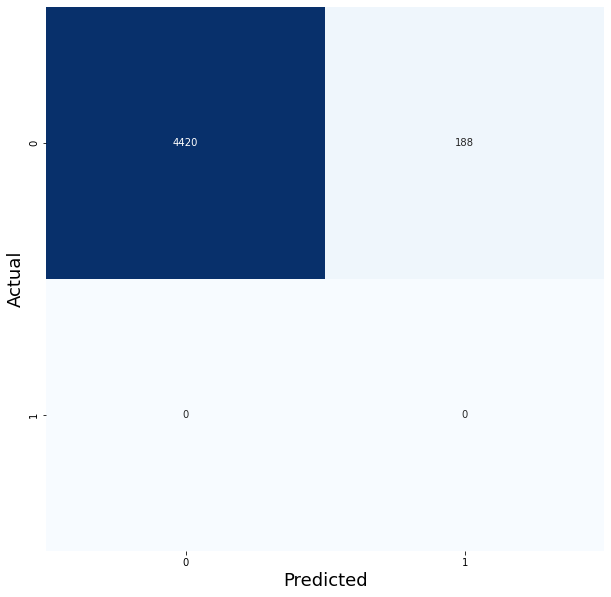

In [20]:
from matplotlib.colors import LinearSegmentedColormap

preds = event_label_baseline["event_label_preds"][23].split(',')
labels = event_label_baseline["event_label_labels"][23].split(',')

colorOrange = (0.925, 0.686, 0.353) #"ECAF5A"
colorHeader = (0.302, 0.349, 0.349)
color4 = (0.25, 0.25, 0.25)


custom_cmap = LinearSegmentedColormap.from_list(
    "orange_only",
    [(0.90, 0.90, 0.90), colorOrange],  # white → orange
    N=10
)


def clean_value(value):
    # Remove all brackets, commas, and whitespace
    value = ''.join(c for c in value if c.isdigit())
    return int(value) if value in ['0', '1'] else None  # Or raise error if unexpected

new_preds = [clean_value(v) for v in preds if clean_value(v) is not None]
new_labels = [clean_value(v) for v in labels if clean_value(v) is not None]


cm = confusion_matrix(new_labels, new_preds)

class_names = ['0', '1']

plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names, cbar=False)
plt.xlabel('Predicted', fontsize=18)
plt.ylabel('Actual', fontsize=18)
# plt.title('Event label classification', fontsize=20)

### Forgetting curve

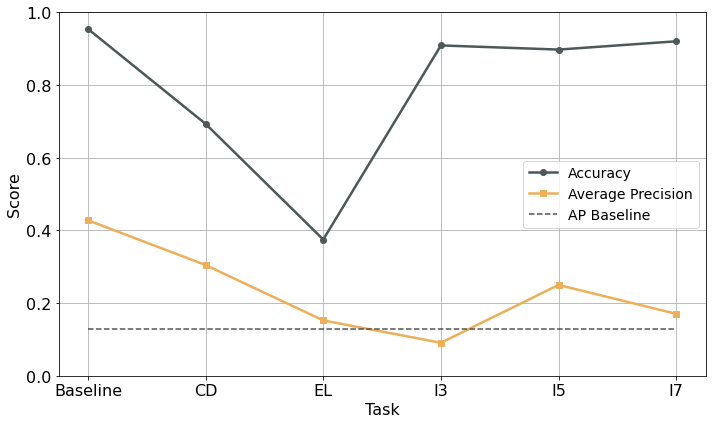

In [3]:
acc = [0.9545, 0.6932, 0.375, 0.9091, 0.8977, 0.9205]
ap = [0.4280, 0.3047, 0.1524, 0.0909, 0.2500, 0.1705]

labels = ["Baseline", "CD", "EL", "I3", "I5", "I7"]  # update as more values come in
x = list(range(len(acc)))  # assumes acc and ap are same length

cmap = plt.get_cmap('mako')
color1 = cmap(0.2)
color2 = cmap(0.6)
colorOrange = (0.925, 0.686, 0.353) #"ECAF5A"
colorHeader = (0.302, 0.349, 0.349)
color4 = (0.25, 0.25, 0.25)

plt.figure(figsize=(10, 6))
plt.plot(x, acc, label='Accuracy', color=colorHeader, marker='o', linewidth=2.5)
plt.plot(x, ap, label='Average Precision', color=colorOrange, marker='s', linestyle='-', linewidth=2.5)
plt.plot(x, [0.13] * len(x), label='AP Baseline', color=color4, alpha= 0.9, linestyle='--', linewidth=1.5)

plt.xticks(ticks=x, labels=labels[:len(x)], fontsize=16)
plt.yticks(fontsize=16)
plt.ylabel("Score", fontsize=16)
plt.xlabel("Task", fontsize=16)
plt.legend(fontsize=14)
plt.grid(True)
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("/home/filip-marcus/figures/forgetting.png", dpi=300, bbox_inches='tight')



### Total learning curve

(87,)


(-20.0, 160.0)

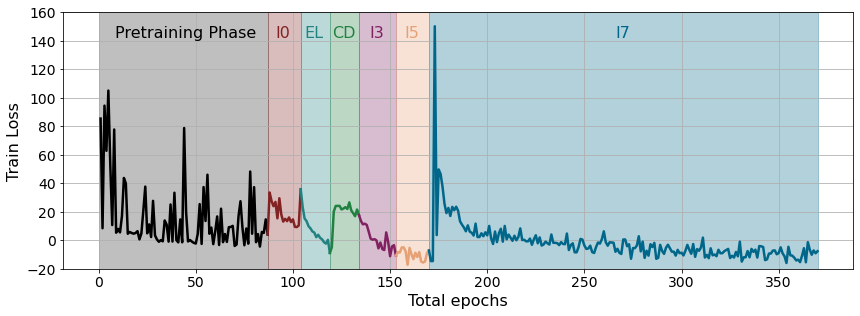

In [35]:
# --------------------------- Updated Code Using start1, start2, ... ---------------------------
# pretrain
loss_pretrain = np.array(pretrain_data_giga['train_loss'])
num_epochs_pretrain = 87
steps_per_epoch = len(loss_pretrain) / num_epochs_pretrain
indecies = np.linspace(0, len(loss_pretrain) - 1, num_epochs_pretrain, dtype=int)
train_loss_pretrain = loss_pretrain[indecies]
# train_loss_pretrain = loss_pretrain[::int(steps_per_epoch)]
print(train_loss_pretrain.shape)

# finetune 1
finetune1 = one["train_loss"]
# finetune1 = one["task_loss"]
num_epochs_finetune_1 = 17
steps_per_epoch = len(finetune1) / num_epochs_finetune_1
indecies = np.linspace(0, len(finetune1) - 1, num_epochs_finetune_1, dtype=int)
train_loss_finetune_1 = finetune1[indecies]

train_loss = np.concatenate((train_loss_pretrain, train_loss_finetune_1))

# finetune 2
finetune2 = two["train_loss"]
# finetune2 = two["task_loss"]
num_epochs_finetune_2 = 15
steps_per_epoch = len(finetune2) / num_epochs_finetune_2
indecies = np.linspace(0, len(finetune2) - 1, num_epochs_finetune_2, dtype=int)
train_loss_finetune_2 = finetune2[indecies]
train_loss = np.concatenate((train_loss, train_loss_finetune_2))


# finetune 3
finetune3 = three["train_loss"]
# finetune3 = three["task_loss"]
num_epochs_finetune_3 = 15
steps_per_epoch = len(finetune3) / num_epochs_finetune_3
indecies = np.linspace(0, len(finetune3) - 1, num_epochs_finetune_3, dtype=int)
train_loss_finetune_3 = finetune3[indecies]
train_loss = np.concatenate((train_loss, train_loss_finetune_3))


# finetune 4
finetune4 = four["train_loss"]
# finetune4 = four["task_loss"]
num_epochs_finetune_4 = 19
steps_per_epoch = len(finetune4) / num_epochs_finetune_4
indecies = np.linspace(0, len(finetune4) - 1, num_epochs_finetune_4, dtype=int)
train_loss_finetune_4 = finetune4[indecies]
train_loss = np.concatenate((train_loss, train_loss_finetune_4))

# finetune 5
finetune5 = five["train_loss"]
# finetune5 = five["task_loss"]
num_epochs_finetune_5 = 17
steps_per_epoch = len(finetune5) / num_epochs_finetune_5
indecies = np.linspace(0, len(finetune5) - 1, num_epochs_finetune_5, dtype=int)
train_loss_finetune_5 = finetune5[indecies]
train_loss = np.concatenate((train_loss, train_loss_finetune_5))

# finetune 6
finetune6 = six["train_loss"]
# finetune6 = six["task_loss"]
num_epochs_finetune_6 = 200
steps_per_epoch = len(finetune6) / num_epochs_finetune_6
indecies = np.linspace(0, len(finetune6) - 1, num_epochs_finetune_6, dtype=int)
train_loss_finetune_6 = finetune6[indecies]
train_loss = np.concatenate((train_loss, train_loss_finetune_6))


# Epoch markers
start1 = num_epochs_pretrain
start2 = start1 + num_epochs_finetune_1
start3 = start2 + num_epochs_finetune_2
start4 = start3 + num_epochs_finetune_3
start5 = start4 + num_epochs_finetune_4
start6 = start5 + num_epochs_finetune_5
end = start6 + num_epochs_finetune_6

epochs = np.arange(1, end + 1)


cmap = plt.get_cmap('mako')

pretrain_shade_color = (0,0,0)
# color1 = cmap(0.1)
# color2 = cmap(0.25)
# color3 = cmap(0.4)
# color4 = cmap(0.5)
# color5 = cmap(0.6)
# color6 = cmap(0.7)



color1 = red
color2 = turk
color3 = green
color4 = purple
color5 = yellow
color6 = blue


# Plotting
width = 7.086
height = width / 3
plt.figure(figsize=(2 * width, 2 * height))

# shaded spans with start vars
plt.axvspan(0, start1, color=pretrain_shade_color, alpha=0.25, label='Pretrain phase')
plt.axvspan(start1, start2, color=color1, alpha=0.3, label='Event Label')
plt.axvspan(start2, start3, color=color2, alpha=0.3, label='Class Distribution')
plt.axvspan(start3, start4, color=color3, alpha=0.3, label='Interruption in Sequence')
plt.axvspan(start4, start5, color=color4, alpha=0.3, label='Interruption 3-Day')
plt.axvspan(start5, start6, color=color5, alpha=0.3, label='Interruption 5-Day')
plt.axvspan(start6, end, color=color6, alpha=0.3, label='Interruption 7-Day')

# annotations
plt.text(x=45, y=max(train_loss) * 0.95, s="Pretraining Phase", fontsize=16, color=pretrain_shade_color, ha='center')
plt.text(x=(start1 + start2)//2, y=max(train_loss) * 0.95, s="I0", fontsize=16, color=color1, ha='center')
plt.text(x=(start2 + start3)//2, y=max(train_loss) * 0.95, s="EL", fontsize=16, color=color2, ha='center')
plt.text(x=(start3 + start4)//2, y=max(train_loss) * 0.95, s="CD", fontsize=16, color=color3, ha='center')
plt.text(x=(start4 + start5)//2, y=max(train_loss) * 0.95, s="I3", fontsize=16, color=color4, ha='center')
plt.text(x=(start5 + start6)//2, y=max(train_loss) * 0.95, s="I5", fontsize=16, color=color5, ha='center')
plt.text(x=(start6 + end)//2, y=max(train_loss) * 0.95, s="I7", fontsize=16, color=color6, ha='center')

# line plots
plt.plot(epochs[:start1], train_loss[:start1], label='Train Loss (Pretrain)', color=pretrain_shade_color, linewidth=2.5, alpha=1)
plt.plot(epochs[start1-1:start2], train_loss[start1-1:start2], color=color1, linewidth=2.5, alpha=1)
plt.plot(epochs[start2-1:start3], train_loss[start2-1:start3], color=color2, linewidth=2.5, alpha=1)
plt.plot(epochs[start3-1:start4], train_loss[start3-1:start4], color=color3, linewidth=2.5, alpha=1)
plt.plot(epochs[start4-1:start5], train_loss[start4-1:start5], color=color4, linewidth=2.5, alpha=1)
plt.plot(epochs[start5-1:start6], train_loss[start5-1:start6], color=color5, linewidth=2.5, alpha=1)
plt.plot(epochs[start6-1:end], train_loss[start6-1:end], color=color6, linewidth=2.5, alpha=1)

plt.xlabel('Total epochs', fontsize=16)
plt.ylabel('Train Loss', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.ylim(-20, 160)
# plt.yscale('log')
# plt.savefig("/home/filip-marcus/figures/full_learning_curve_FM.png", dpi=300, bbox_inches='tight')

### Shortening the prediction window

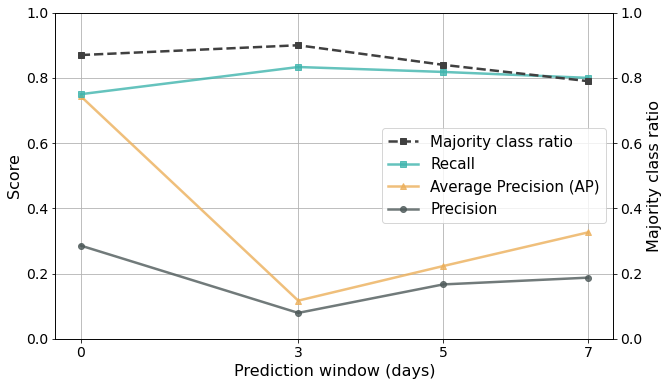

In [7]:
accuracies = [0.9659, 0.9318, 0.8750, 0.8295]
# ap = [0.8683, 0.0941, 0.1982, 0.3187] # gammal
# ap = [0.7436, 0.1170, 0.2230, 0.3263] # SM
# ap = [0.7776, 0.2223, 0.2370, 0.3036]
ap = [0.7436, 0.1170, 0.2230, 0.3263]
precision = [0.2857, 0.0794, 0.1667, 0.1875]
recall = [0.75, 0.8333, 0.8182, 0.8]
minority = [0.13, 0.10, 0.16, 0.21]
majority = [1 - i for i in minority] 
x = [0, 3, 5, 7]

# width = 7.086
# height = width / 3
width = 10
height = 6

cmap = plt.get_cmap('mako')
color1 = cmap(0.2)
color2 = cmap(0.6)
color3 = cmap(0.7)  # new color for AP
colorOrange = (0.925, 0.686, 0.353) #"ECAF5A"
colorHeader = (0.302, 0.349, 0.349)
color4 = (0.25, 0.25, 0.25)


fig, ax1 = plt.subplots(figsize=(width, height))

# Accuracy plot
ax1.plot(x, precision, marker='o', color=colorHeader, linewidth=2.5, alpha=0.8, label='Precision')
# AP plot
ax1.plot(x, ap, marker='^', color=colorOrange, linewidth=2.5, alpha=0.8, label='Average Precision (AP)')
ax1.plot(x, recall, marker='s', color=color3, linewidth=2.5, alpha=0.8, label='Recall')

ax1.set_xlabel('Prediction window (days)', fontsize=16)
ax1.set_ylabel('Score', fontsize=16)
ax1.set_ylim(0, 1)
ax1.set_xticks(x)
ax1.set_xticklabels(['0', '3', '5', '7'], fontsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.grid(True)

# Twin axis for class imbalance
ax2 = ax1.twinx()
ax2.plot(x, majority, marker='s', linestyle='--', color=color4, linewidth=2.5, label='Majority class ratio')
ax2.set_ylabel('Majority class ratio', fontsize=16)
ax2.set_ylim(0, 1)
ax2.yaxis.set_tick_params(labelsize=14)


# Combine legends from both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

# Merge and reorder manually
all_lines = lines + lines2
all_labels = labels + labels2

# Create a dict to map labels to handles
legend_dict = dict(zip(all_labels, all_lines))

# Desired order
ordered_labels = ['Majority class ratio', 'Recall','Average Precision (AP)', 'Precision']
ordered_lines = [legend_dict[label] for label in ordered_labels]

# Set legend in desired order
ax1.legend(ordered_lines, ordered_labels, fontsize=15)

# plt.tight_layout()
# plt.savefig("/home/filip-marcus/figures/shortening_prediction_window_sm.png", dpi=300, bbox_inches='tight')

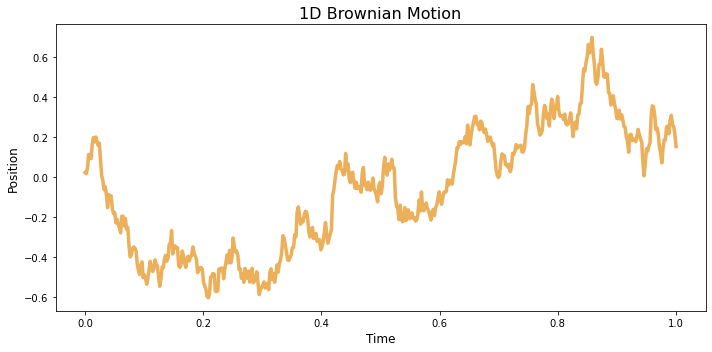

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n_steps = 500
T = 1.0  # total time
dt = T / n_steps
time = np.linspace(0, T, n_steps)

# Brownian motion
np.random.seed(42)
dW = np.sqrt(dt) * np.random.randn(n_steps)
W = np.cumsum(dW)


color = (0.925, 0.686, 0.353) #"ECAF5A"

# Plot
# plt.style.use("seaborn-vivid")  # Use a nice style
plt.figure(figsize=(10, 5))
plt.plot(time, W, lw=3.5, color=color)
plt.title("1D Brownian Motion", fontsize=16)
plt.xlabel("Time", fontsize=12)
plt.ylabel("Position", fontsize=12)
# plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


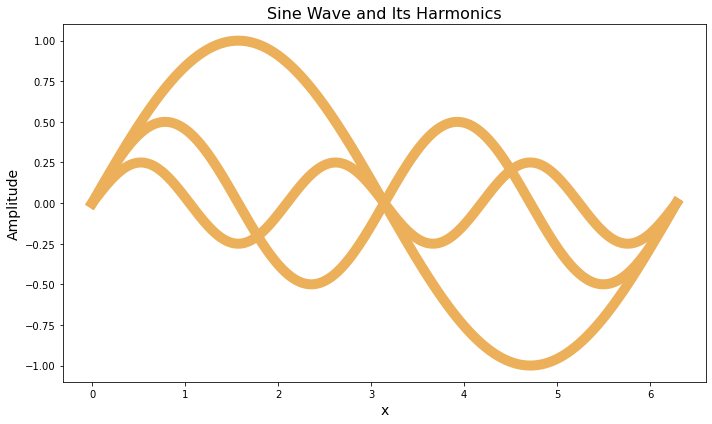

In [11]:
color = (0.925, 0.686, 0.353) #"ECAF5A"
# Parameters
x = np.linspace(0, 2 * np.pi, 1000)  # x values from 0 to 2π
fundamental_freq = np.sin(x)  # Fundamental sine wave
harmonic_2 = np.sin(2 * x)*0.5  # Second harmonic
harmonic_3 = np.sin(3 * x)*0.25  # Third harmonic
harmonic_4 = np.sin(4 * x)  # Fourth harmonic

# Plot
plt.figure(figsize=(10, 6))
plt.plot(x, fundamental_freq, label="Fundamental (sin(x))", color = color,linewidth=10)
plt.plot(x, harmonic_2, label="2nd Harmonic (sin(2x))", color = color,linewidth=10)
plt.plot(x, harmonic_3, label="3rd Harmonic (sin(3x))", color = color, linewidth=10)
# plt.plot(x, harmonic_4, label="4th Harmonic (sin(4x))", linestyle=':', linewidth=2)

plt.title("Sine Wave and Its Harmonics", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("Amplitude", fontsize=14)
plt.grid(False)
plt.tight_layout()
plt.show()

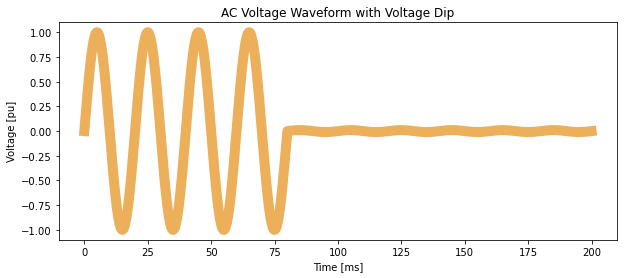

In [16]:
import numpy as np
import matplotlib.pyplot as plt
color = (0.925, 0.686, 0.353) #"ECAF5A"
# Parameters
f = 50  # frequency in Hz
t = np.linspace(0, 0.2, 1000)  # 0.2 seconds total time
A = 1.0  # normal amplitude
dip_start = 0.08  # dip starts at 80 ms
dip_end = 0.2    # dip ends at 120 ms
dip_factor = 0.01  # 40% of normal amplitude during dip

# Sine wave
sine_wave = A * np.sin(2 * np.pi * f * t)

# Apply voltage dip
dip_mask = (t >= dip_start) & (t <= dip_end)
sine_wave[dip_mask] *= dip_factor

# Plot
plt.figure(figsize=(10, 4))
plt.plot(t * 1000, sine_wave, label='Voltage waveform', color=color, linewidth=10)
#plt.axvspan(dip_start * 1000, dip_end * 1000, color='red', alpha=0.2, label='Voltage dip')
plt.title('AC Voltage Waveform with Voltage Dip')
plt.xlabel('Time [ms]')
plt.ylabel('Voltage [pu]')

plt.show()

Text(0, 0.5, 'Voltage [pu]')

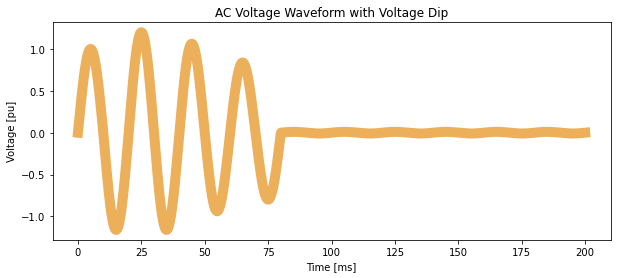

In [19]:
import numpy as np
import matplotlib.pyplot as plt

color = (0.925, 0.686, 0.353)  # "ECAF5A"

# Parameters
f = 50  # frequency in Hz
t = np.linspace(0, 0.2, 1000)  # 0.2 seconds total time
A = 1.0  # normal amplitude
dip_start = 0.08  # dip starts at 80 ms
dip_end = 0.2    # dip ends at 200 ms
dip_factor = 0.01  # 1% of normal amplitude during dip

# Sine wave
sine_wave = A * np.sin(2 * np.pi * f * t)

# Add amplitude fluctuations before the dip
pre_dip_mask = (t >= 0.01) & (t < dip_start)  # from 50 ms to 80 ms
fluctuation = 1 + 0.2 * np.sin(2 * np.pi * 10 * t[pre_dip_mask])  # 10 Hz fluctuation, ±10%
sine_wave[pre_dip_mask] *= fluctuation

# Apply voltage dip
dip_mask = (t >= dip_start) & (t <= dip_end)
sine_wave[dip_mask] *= dip_factor
# Plot
plt.figure(figsize=(10, 4))
plt.plot(t * 1000, sine_wave, label='Voltage waveform', color=color, linewidth=10)
#plt.axvspan(dip_start * 1000, dip_end * 1000, color='red', alpha=0.2, label='Voltage dip')
plt.title('AC Voltage Waveform with Voltage Dip')
plt.xlabel('Time [ms]')
plt.ylabel('Voltage [pu]')


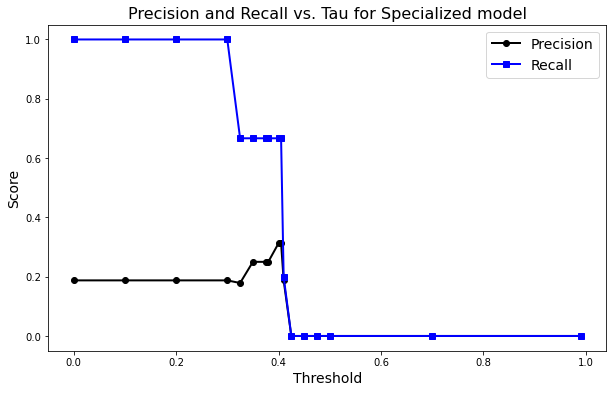

In [ ]:
# Precision-Tau curve

# tau = [0.0, 0.1, 0.2, 0.3, 0.325, 0.35, 0.375, 0.38, 0.4, 0.405, 0.41, 0.425, 0.45, 0.475, 0.5, 0.7, 0.99]
# precision = [0.1875, 0.1875, 0.1875, 0.1875, 0.1786, 0.25, 0.25, 0.25, 0.3125, 0.3125, 0.1875,0, 0, 0, 0, 0, 0]
# recall = [1, 1, 1, 1, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.6667, 0.20, 0, 0, 0, 0, 0, 0]


tau = []
precision = []
recall = []



plt.figure(figsize=(10, 6))
plt.plot(tau, precision, marker='o', color='black', label='Precision', linewidth=2)
plt.plot(tau, recall, marker='s', color='blue', label='Recall', linewidth=2)
plt.title('Precision and Recall vs. Tau for Specialized model', fontsize=16)
plt.xlabel('Threshold', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.xscale('linear')
plt.legend(fontsize=14)

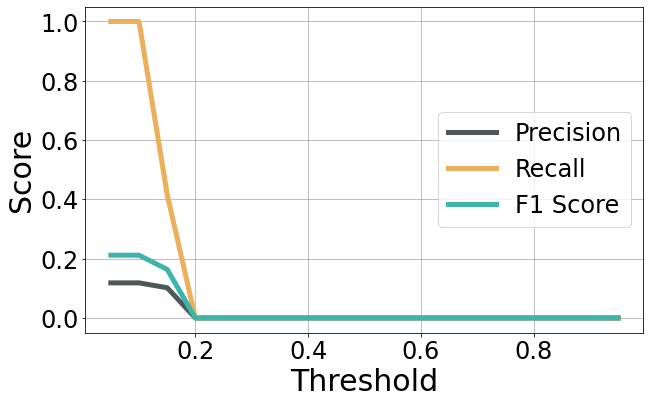

In [5]:
# precision/recall vs tau

# tau = np.linspace(0.01, 0.99, 99)
tau = np.linspace(0.05, 0.95, 19)

# eneryield  base 7d
# precision = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_base.csv', delimiter=',')[0,:]
# recall = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_base.csv', delimiter=',')[1,:]

# giga base 7d
# precision = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_giga_mind_base.csv', delimiter=',')[0,:]
# recall = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_giga_mind_base.csv', delimiter=',')[1,:]

# eneryield finetuned 7d
# precision = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_finetuned.csv', delimiter=',')[0,:]
# recall = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_finetuned.csv', delimiter=',')[1,:]

# eneryield final base event label
# precision = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_final_event_label.csv', delimiter=',')[0,:]
# recall = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_final_event_label.csv', delimiter=',')[1,:]

# eneryield final interruption in seq
# precision = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_final_interruption_in_seq.csv', delimiter=',')[0,:]
# recall = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_final_interruption_in_seq.csv', delimiter=',')[1,:]

# eneryield final interruption 3 day
precision = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_final_interruption_3_day.csv', delimiter=',')[0,:]
recall = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_final_interruption_3_day.csv', delimiter=',')[1,:]

# eneryield final interruption 5 day
# precision = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_final_interruption_5_day.csv', delimiter=',')[0,:]
# recall = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_final_interruption_5_day.csv', delimiter=',')[1,:]

# eneryield final interruption 7 day
# precision = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_final_interruption_7_day.csv', delimiter=',')[0,:]
# recall = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_eneryield_final_interruption_7_day.csv', delimiter=',')[1,:]


f1 = 2 * (precision * recall) / (precision + recall + 0.000001)
cmap = plt.get_cmap('mako')
colorOrange = (0.925, 0.686, 0.353) #"ECAF5A"
colorHeader = (0.302, 0.349, 0.349)
color3 = cmap(0.7)  # new color for AP
plt.figure(figsize=(10, 6))
plt.plot(tau, precision, color=colorHeader, label='Precision', linewidth=5)
plt.plot(tau, recall, color=colorOrange, label='Recall', linewidth=5)
plt.plot(tau, f1, color=color3, label='F1 Score', linewidth=5)
plt.xlabel('Threshold', fontsize=30)
plt.xticks(fontsize=24)
plt.ylabel('Score', fontsize=30)
plt.yticks(fontsize=24)
plt.legend(fontsize=24, loc = 'right')
plt.ylim(-0.05, 1.05)
plt.grid(True)
# plt.savefig("/home/filip-marcus/figures/threshold_tuning_eneryield_finetuned.png", dpi=300, bbox_inches='tight')

In [6]:
# Find index of maximum precision
metric = precision
max_precision_idx = np.argmax(metric)

# Get the corresponding tau
best_tau = tau[max_precision_idx]
best_precision = precision[max_precision_idx]
best_recall = recall[max_precision_idx]

# Print or log the best threshold and corresponding metrics
print(f"Best Tau (max precision): {best_tau:.4f}")
print(f"Precision at Best Tau: {best_precision:.4f}")
print(f"Recall at Best Tau: {best_recall:.4f}")

Best Tau (max precision): 0.0500
Precision at Best Tau: 0.1184
Recall at Best Tau: 1.0000


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


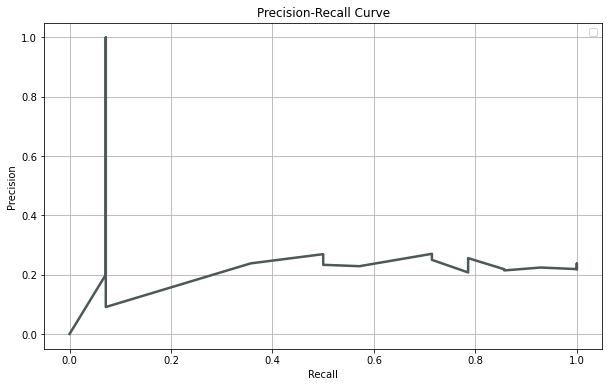

In [ ]:
# precision - recall curve
precision = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_giga_mind_base.csv', delimiter=',')[0,:]
recall = np.loadtxt('/home/filip-marcus/ESGPT_new/EventStreamGPT/precision_recall_giga_mind_base.csv', delimiter=',')[1,:]

# Sort recall and reorder precision accordingly
sorted_indices = np.argsort(recall)
recall_sorted = recall[sorted_indices]
precision_sorted = precision[sorted_indices]

# Plot Precision-Recall curve
plt.figure(figsize=(10, 6))
plt.plot(recall_sorted, precision_sorted, linewidth=2.5, color=colorHeader)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()